<a href="https://colab.research.google.com/github/abhi1196ds/Distracted-Driver-MultiAction-Classification/blob/My-repository/distracted_driver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
%tensorflow_version 2.x

In [8]:
!wget https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip

--2022-02-15 17:57:18--  https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip [following]
--2022-02-15 17:57:18--  https://www.dropbox.com/s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdb30d75a201934dad4f1e84caf.dl.dropboxusercontent.com/cd/0/inline/BfzOQ2v1--kesihmm5sht8tS4F4Cp3fDOEUSf1N2qTCbFL2jGFfOUffsn0uPI7cG9LULQ2Sd0OlEPrlEACJTVA4bT-XnU_oGAuE6XbA6Rv7hJIfV8ShnjRLBmR2bXVWgRFLRpkNl_AGIhxrJaCSAFjCi/file# [following]
--2022-02-15 17:57:19--  https://ucdb30d75a201934dad4f1e84caf.dl.dropboxusercontent.com/cd/0/inline

In [9]:
ls

sample_data/  state-farm-distracted-driver-detection.zip


In [10]:
!unzip state-farm-distracted-driver-detection.zip

Archive:  state-farm-distracted-driver-detection.zip
  inflating: sample_submission.csv   
  inflating: driver_imgs_list.csv    
  inflating: imgs.zip                


In [11]:
ls

driver_imgs_list.csv  sample_submission.csv
imgs.zip              state-farm-distracted-driver-detection.zip
sample_data/


In [12]:
!unzip imgs.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/c7/img_56661.jpg  
  inflating: train/c7/img_56699.jpg  
  inflating: train/c7/img_56717.jpg  
  inflating: train/c7/img_56724.jpg  
  inflating: train/c7/img_56768.jpg  
  inflating: train/c7/img_56779.jpg  
  inflating: train/c7/img_56849.jpg  
  inflating: train/c7/img_56899.jpg  
  inflating: train/c7/img_56938.jpg  
  inflating: train/c7/img_5706.jpg   
  inflating: train/c7/img_57076.jpg  
  inflating: train/c7/img_57122.jpg  
  inflating: train/c7/img_57137.jpg  
  inflating: train/c7/img_5715.jpg   
  inflating: train/c7/img_57278.jpg  
  inflating: train/c7/img_57321.jpg  
  inflating: train/c7/img_57345.jpg  
  inflating: train/c7/img_57355.jpg  
  inflating: train/c7/img_5741.jpg   
  inflating: train/c7/img_57433.jpg  
  inflating: train/c7/img_5753.jpg   
  inflating: train/c7/img_57559.jpg  
  inflating: train/c7/img_57594.jpg  
  inflating: train/c7/img_5771.jpg   
  inflating: train/c7/img_57712.jpg  

In [13]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout

In [14]:
len(os.listdir('test'))

79726

In [15]:
print(len(os.listdir('train/c0')))
print(len(os.listdir('train/c1')))
print(len(os.listdir('train/c2')))
print(len(os.listdir('train/c3')))
print(len(os.listdir('train/c4')))
print(len(os.listdir('train/c5')))
print(len(os.listdir('train/c6')))
print(len(os.listdir('train/c7')))
print(len(os.listdir('train/c8')))
print(len(os.listdir('train/c9')))

2489
2267
2317
2346
2326
2312
2325
2002
1911
2129


In [16]:
model=Sequential()
model.add(Conv2D(32,(5,5),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation="relu"))

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
#Test directory
%mkdir Test

In [21]:
#moving the test images to Test directory
!mv /content/test/  /content/Test

In [22]:
train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        subset='training'
        )

validation_generator = train_datagen.flow_from_directory(
        '/content/train',
         target_size=(64, 64),
         batch_size=32,
        class_mode='categorical',
         subset='validation'
        )


test_generator = test_datagen.flow_from_directory(
    '/content/Test',
        target_size=(64, 64),
        batch_size=2,
        shuffle=False,
        class_mode='categorical'
    
)

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.
Found 79726 images belonging to 1 classes.


In [23]:
type(test_generator)

keras.preprocessing.image.DirectoryIterator

In [24]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS=validation_generator.n//train_generator.batch_size

FIT

In [25]:
model.fit(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=VALIDATION_STEPS)

Epoch 1/10
560/560 [==============================] - 337s 599ms/step - loss: 3.7429 - accuracy: 0.1119 - val_loss: 3.5870 - val_accuracy: 0.2011
Epoch 2/10
560/560 [==============================] - 324s 578ms/step - loss: 2.2559 - accuracy: 0.2397 - val_loss: 2.3772 - val_accuracy: 0.1038
Epoch 3/10
560/560 [==============================] - 328s 585ms/step - loss: 2.1635 - accuracy: 0.1908 - val_loss: 1.9931 - val_accuracy: 0.2592
Epoch 4/10
560/560 [==============================] - 328s 585ms/step - loss: 2.1684 - accuracy: 0.1916 - val_loss: 2.0653 - val_accuracy: 0.2708
Epoch 5/10
560/560 [==============================] - 329s 588ms/step - loss: 2.1203 - accuracy: 0.2156 - val_loss: 1.9275 - val_accuracy: 0.2775
Epoch 6/10
560/560 [==============================] - 327s 583ms/step - loss: 1.8756 - accuracy: 0.3421 - val_loss: 1.6491 - val_accuracy: 0.4145
Epoch 7/10
560/560 [==============================] - 326s 582ms/step - loss: nan - accuracy: 0.3146 - val_loss: nan - val_a

In [26]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization

In [27]:
mod = Sequential()
mod.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(64,64,3)))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))
mod.add(Conv2D(64,kernel_size=(5,5),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))
mod.add(Conv2D(128,kernel_size=(5,5),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.5))
mod.add(Flatten())
mod.add(Dense(units = 512,activation='relu'))
mod.add(BatchNormalization())
mod.add(Dropout(0.5))
mod.add(Dense(units = 128,activation='relu'))
mod.add(Dropout(0.25))
mod.add(Dense(10,activation='softmax'))

In [28]:
mod.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

VALIDATE

In [29]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS=validation_generator.n//train_generator.batch_size

In [30]:
model2=mod.fit(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=VALIDATION_STEPS)

Epoch 1/5
560/560 [==============================] - 483s 861ms/step - loss: 1.9228 - accuracy: 0.3579 - val_loss: 1.7214 - val_accuracy: 0.4402
Epoch 2/5
560/560 [==============================] - 473s 844ms/step - loss: 1.1179 - accuracy: 0.6028 - val_loss: 0.6303 - val_accuracy: 0.7884
Epoch 3/5
560/560 [==============================] - 470s 839ms/step - loss: 0.7821 - accuracy: 0.7257 - val_loss: 0.4356 - val_accuracy: 0.8587
Epoch 4/5
560/560 [==============================] - 475s 848ms/step - loss: 0.6195 - accuracy: 0.7878 - val_loss: 0.4341 - val_accuracy: 0.8424
Epoch 5/5
560/560 [==============================] - 477s 852ms/step - loss: 0.4968 - accuracy: 0.8298 - val_loss: 0.3127 - val_accuracy: 0.8946


In [31]:
%matplotlib inline  
import matplotlib.pyplot as plt

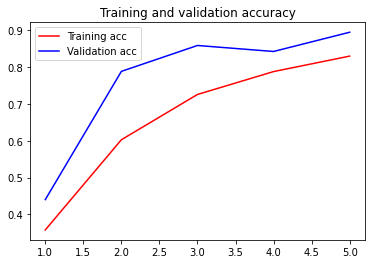

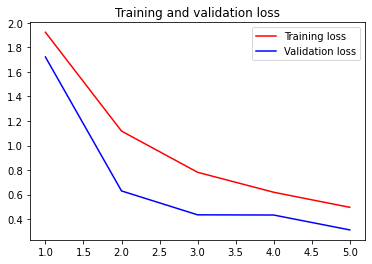

In [32]:
acc = model2.history['accuracy']
val_acc = model2.history['val_accuracy']
loss = model2.history['loss']
val_loss = model2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
#plotting train and validation losses
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [33]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=mod.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

39863/39863 [==============================] - 1085s 27ms/step


In [34]:
pred

array([[2.2329634e-06, 8.4407761e-09, 8.0571798e-09, ..., 6.0161980e-08,
        1.3636300e-06, 8.1702092e-06],
       [1.1954127e-08, 7.5557630e-11, 4.5196220e-08, ..., 1.2785955e-07,
        1.2310643e-06, 3.2366290e-07],
       [2.9535672e-01, 9.2977472e-03, 3.3626857e-05, ..., 9.0864582e-05,
        1.6716891e-03, 6.8406200e-01],
       ...,
       [8.1800213e-03, 5.4631854e-04, 4.2780223e-03, ..., 2.0371014e-04,
        2.7903114e-02, 1.2946834e-01],
       [5.2992104e-06, 2.1396845e-06, 5.5818636e-02, ..., 9.2141549e-05,
        1.3184309e-01, 2.8201002e-05],
       [3.4773606e-10, 9.8816441e-13, 5.6943919e-13, ..., 6.5813641e-13,
        1.9633555e-09, 1.2272933e-07]], dtype=float32)

In [35]:
len(pred)

79726

In [36]:
labels_test_predictions = pd.DataFrame(pred)
labels_test_predictions

,0,1,2,3,4,5,6,7,8,9
0,2.232963e-06,8.440776e-09,8.057180e-09,9.357537e-08,2.123301e-07,0.999988,9.409386e-08,6.016198e-08,1.363630e-06,8.170209e-06
1,1.195413e-08,7.555763e-11,4.519622e-08,1.174075e-08,1.661801e-08,0.999998,1.551678e-08,1.278596e-07,1.231064e-06,3.236629e-07
2,2.953567e-01,9.297747e-03,3.362686e-05,1.222613e-03,7.860364e-03,0.000094,3.101915e-04,9.086458e-05,1.671689e-03,6.840620e-01
3,1.020860e-01,1.060036e-02,1.414191e-02,4.052252e-03,2.251077e-01,0.030782,2.671026e-01,1.464531e-03,2.383399e-01,1.063224e-01
4,5.300273e-02,1.446070e-07,7.684079e-06,3.808135e-01,4.761755e-01,0.049728,1.274117e-06,8.389791e-07,3.279005e-02,7.479823e-03
...,...,...,...,...,...,...,...,...,...,...
79721,9.113978e-03,7.489876e-01,2.739487e-04,2.491623e-03,6.315422e-04,0.151733,1.865523e-02,2.603704e-02,2.035196e-02,2.172455e-02
79722,1.157140e-01,2.809417e-01,2.261929e-03,1.710395e-02,6.032885e-03,0.000152,1.164469e-01,9.112759e-05,5.763741e-03,4.554918e-01
79723,8.180021e-03,5.463185e-04,4.278022e-03,2.265027e-03,7.577370e-01,0.000460,6.895854e-02,2.037101e-04,2.790311e-02,1.294683e-01
79724,5.299210e-06,2.139685e-06,5.581864e-02,1.308605e-08,2.071812e-05,0.000002,8.121877e-01,9.214155e-05,1.318431e-01,2.820100e-05


In [37]:
labels_test_predictions.to_csv('Distracted_Driver_MultiAction_Classification.csv',index=False)

In [38]:
from google.colab import files
files.download("Distracted_Driver_MultiAction_Classification.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>